In [38]:
# 理解FashionMNIST数据集
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
from tqdm.auto import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F

print(sys.version_info)
for module in mpl, np, pd, sklearn, torch:
    print(module.__name__, module.__version__)# 显示版本信息
    
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")# 判断是否有GPU，如果有则使用GPU，否则使用CPU
print(device)# 显示设备信息

sys.version_info(major=3, minor=12, micro=2, releaselevel='final', serial=0)
matplotlib 3.10.0
numpy 2.2.1
pandas 2.2.3
sklearn 1.6.0
torch 2.5.1+cpu
cpu


In [53]:
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision import transforms

transform = transforms.Compose([
     transforms.ToTensor()# 将图片转换为Tensor
])
train_ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transform
)# 加载数据集，并将其转换为Tensor格式

test_ds = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transform
)# 加载测试数据集，并将其转换为Tensor格式

In [40]:
type(train_ds)# 显示数据集类型

torchvision.datasets.mnist.FashionMNIST

In [41]:
len(train_ds)# 显示训练数据集的长度

60000

In [42]:
type(train_ds[0])# 显示训练数据集的第一个元素类型

tuple

In [54]:
img, label = train_ds[0]# 显示第一个元素的图像和标签
img.shape, label# 显示第一个元素的形状和标签

(torch.Size([1, 28, 28]), 9)

In [44]:
type(img)# 显示图像类型

PIL.Image.Image

In [55]:
img[0]# 显示第一个通道的图像

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510, 0.2863, 0.0000,
         0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000

In [ ]:
img# 显示图像

In [56]:
def cal_mean_std(ds):
    mean = 0.
    std = 0.
    for img, _ in ds: # 遍历数据集，计算每个图像的均值和标准差
        mean += img.mean(dim=(1, 2))# 计算每个图像的均值和标准差
        std += img.std(dim=(1, 2))# 计算每个图像的均值和标准差
    mean /= len(ds)# 计算每个图像的均值和标准差
    std /= len(ds)# 计算每个图像的均值和标准差
    return mean, std

print(cal_mean_std(train_ds))

(tensor([0.2860]), tensor([0.3205]))


In [47]:
type(img)# 显示图像类型

PIL.Image.Image

In [48]:
label# 显示标签

9

In [49]:
type(img)# 显示图像类型

PIL.Image.Image

In [50]:
label# 显示标签

9

In [51]:
def show_img_content(img):
    from PIL import Image
    print("图像大小:", img.size)
    print("图像模式:", img.mode)
    if img.mode == 'L':
        pixel_values = list(img.getdata())# 显示图像的像素值
        print(pixel_values)# 显示图像的像素值
show_img_content(img)# 显示图像的内容

图像大小: (28, 28)
图像模式: L
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 13, 73, 0, 0, 1, 4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 36, 136, 127, 62, 54, 0, 0, 0, 1, 3, 4, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 102, 204, 176, 134, 144, 123, 23, 0, 0, 0, 0, 12, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 155, 236, 207, 178, 107, 156, 161, 109, 64, 23, 77, 130, 72, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141, 88, 172, 66, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196, 229, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245, 173, 0, 0, 0, 

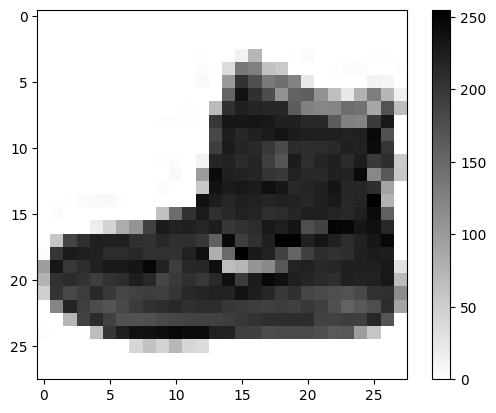

In [52]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary") # 显示图片
    plt.colorbar() # 显示颜色条
    plt.show()
show_single_image(img)